<a href="https://colab.research.google.com/github/John-p-v1999/Eigen-faces/blob/master/reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:


from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np



In [61]:


from google.colab import drive
drive.mount('/content/gdrive/')



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [62]:


train_datagen=ImageDataGenerator(rescale = 1./255)
train_dir=os.path.join('/content/gdrive/My Drive/Dataset/data/train/')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(231,195),
                                                  batch_size=81,
                                                  class_mode='categorical')



Found 79 images belonging to 8 classes.


In [63]:
x,y=train_generator.next()

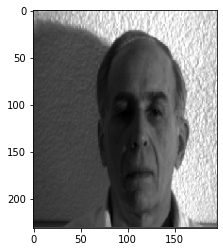

In [64]:


import matplotlib.pyplot as plt
plt.imshow(x[0])



In [65]:
x_train=x.reshape(79,135135)
print(x_train.shape)

(79, 135135)


In [66]:


height=231
width=195
channel=3



In [67]:
mean_face=np.zeros((1,height*width*channel))
for ele in x_train:
  mean_face=np.add(mean_face,ele)
mean_face=np.divide(mean_face,x_train.shape[0])

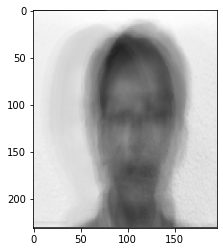

In [68]:


plt.imshow(mean_face.reshape(height,width,channel))



In [69]:
normalised_img=np.ndarray(shape=x_train.shape)
for i,ele in enumerate(x_train):
  normalised_img[i]=np.subtract(ele,mean_face)

In [70]:
print(normalised_img.shape)

(79, 135135)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


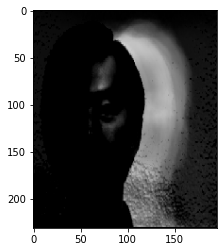

In [71]:
plt.imshow(normalised_img[1].reshape(height,width,channel))
plt.show()

In [72]:
normalised_img.shape

(79, 135135)

In [73]:
cov_matrix = np.cov(normalised_img)
cov_matrix=np.divide(cov_matrix,79.0)
print(cov_matrix)

[[ 8.95795093e-04  9.16920933e-04 -1.59792972e-04 ... -6.69278390e-05
  -7.42996188e-05 -2.62633678e-04]
 [ 9.16920933e-04  2.21278686e-03 -4.51208154e-04 ... -1.40918837e-04
  -1.21394347e-04 -5.12205562e-04]
 [-1.59792972e-04 -4.51208154e-04  4.40170767e-04 ...  1.33646539e-04
   8.47801632e-05  8.84854013e-05]
 ...
 [-6.69278390e-05 -1.40918837e-04  1.33646539e-04 ...  5.07402799e-04
   3.43306804e-04 -1.79849984e-04]
 [-7.42996188e-05 -1.21394347e-04  8.47801632e-05 ...  3.43306804e-04
   5.58581227e-04 -1.43533969e-04]
 [-2.62633678e-04 -5.12205562e-04  8.84854013e-05 ... -1.79849984e-04
  -1.43533969e-04  5.82251482e-04]]


In [74]:
cov_matrix.shape

(79, 79)

In [75]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors  \n%s' %eigenvectors)
print('\nEigenvalues  \n%s' %eigenvalues)

Eigenvectors  
[[ 1.34060551e-01+0.00000000e+00j -8.26757279e-02+0.00000000e+00j
   1.22419493e-01+0.00000000e+00j ...  2.05535868e-04+0.00000000e+00j
  -2.21585575e-03+4.33142546e-05j -2.21585575e-03-4.33142546e-05j]
 [ 2.47296253e-01+0.00000000e+00j -1.98985957e-01+0.00000000e+00j
  -4.00184540e-02+0.00000000e+00j ...  2.05535868e-04+0.00000000e+00j
  -2.21585575e-03+4.33142546e-05j -2.21585575e-03-4.33142546e-05j]
 [-4.27287339e-02+0.00000000e+00j  8.68610931e-02+0.00000000e+00j
   6.12011483e-02+0.00000000e+00j ...  2.05535868e-04+0.00000000e+00j
  -2.21585575e-03+4.33142546e-05j -2.21585575e-03-4.33142546e-05j]
 ...
 [ 3.01213330e-02+0.00000000e+00j  1.76293402e-01+0.00000000e+00j
  -3.62026371e-02+0.00000000e+00j ...  2.05535868e-04+0.00000000e+00j
  -2.21585575e-03+4.33142546e-05j -2.21585575e-03-4.33142546e-05j]
 [ 3.63696445e-02+0.00000000e+00j  1.94468312e-01+0.00000000e+00j
  -4.12332457e-03+0.00000000e+00j ... -6.24553080e-01+0.00000000e+00j
  -1.69839752e-01-1.50216110e-03

In [76]:
eigenvectors.shape

(79, 79)

In [77]:


eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]


eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]



Cumulative proportion of variance : 
[0.40041129+0.00000000e+00j 0.56243215+0.00000000e+00j
 0.65943688+0.00000000e+00j 0.7029117 +0.00000000e+00j
 0.73827724+0.00000000e+00j 0.76771819+0.00000000e+00j
 0.79461559+0.00000000e+00j 0.81758174+0.00000000e+00j
 0.83715444+0.00000000e+00j 0.84999961+0.00000000e+00j
 0.86262527+0.00000000e+00j 0.87259266+0.00000000e+00j
 0.88112859+0.00000000e+00j 0.88868414+0.00000000e+00j
 0.89561326+0.00000000e+00j 0.90156758+0.00000000e+00j
 0.90706933+0.00000000e+00j 0.91251465+0.00000000e+00j
 0.91761298+0.00000000e+00j 0.92237392+0.00000000e+00j
 0.9267637 +0.00000000e+00j 0.93054813+0.00000000e+00j
 0.9340461 +0.00000000e+00j 0.9373838 +0.00000000e+00j
 0.94043691+0.00000000e+00j 0.94344098+0.00000000e+00j
 0.94630688+0.00000000e+00j 0.9490334 +0.00000000e+00j
 0.95165133+0.00000000e+00j 0.95410965+0.00000000e+00j
 0.95653565+0.00000000e+00j 0.95891561+0.00000000e+00j
 0.96117243+0.00000000e+00j 0.96340846+0.00000000e+00j
 0.96551422+0.00000000e+00j 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


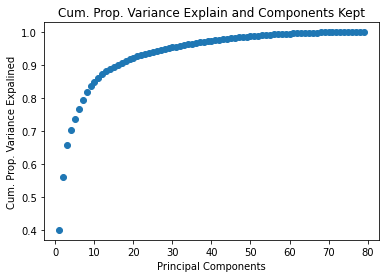

In [78]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)


print("Cumulative proportion of variance : \n%s" %var_comp_sum)


num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [79]:
reduced_data = np.array(eigvectors_sort[:20]).transpose()

In [80]:
reduced_data.shape

(79, 20)

In [81]:


proj_data = np.dot(x_train.transpose(),reduced_data)
proj_data = proj_data.transpose()




In [82]:
proj_data.shape

(20, 135135)

In [83]:
proj_data[0]

array([-2.24244956e-01+0.j, -2.24244956e-01+0.j, -2.24244956e-01+0.j, ...,
       -1.96600054e-16+0.j, -1.96600054e-16+0.j, -1.96600054e-16+0.j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0

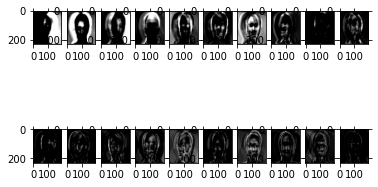

In [84]:


for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width,channel)
    plt.subplot(2,10,1+i)
    plt.imshow(img.astype(np.float), cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()



In [85]:
x_test=x[25]

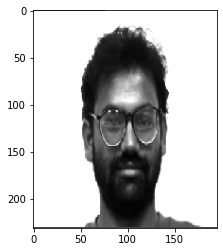

In [86]:
plt.imshow(x_test)

In [87]:
X_test=x_test.reshape(1,135135)

In [88]:
w=np.dot(proj_data,X_test.T)

In [89]:
w

array([[-1.56866423e+04+0.j],
       [ 5.27521824e+04+0.j],
       [ 1.83714804e+04+0.j],
       [ 1.22568045e+04+0.j],
       [ 2.15426010e+04+0.j],
       [-7.08018498e+03+0.j],
       [ 4.24919287e+04+0.j],
       [-6.26557365e+03+0.j],
       [-4.39586268e+04+0.j],
       [-3.11941074e+03+0.j],
       [-2.30251742e+04+0.j],
       [-1.33280501e+04+0.j],
       [-3.36828640e+03+0.j],
       [ 3.48030310e+03+0.j],
       [ 2.04229904e+04+0.j],
       [-4.49064519e+03+0.j],
       [ 1.74716844e+04+0.j],
       [-2.81930996e+01+0.j],
       [ 6.17494195e+03+0.j],
       [-1.25981464e+04+0.j]])

In [90]:
w=w.reshape(1,20)

In [91]:
recon=np.dot(w,proj_data)

In [ ]:
recon.shape

(1, 135135)

image obtained when taking only first 20 eigen vectors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


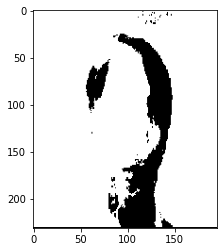

In [92]:
for ele in recon:
  ele=ele.reshape(height,width,channel)
  plt.imshow(ele.astype(np.float))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

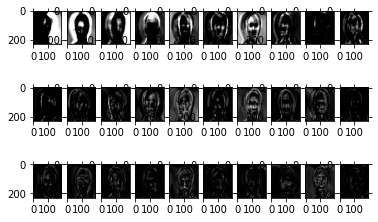

In [93]:
reduced_data = np.array(eigvectors_sort[:30]).transpose()
proj_data = np.dot(x_train.transpose(),reduced_data)
proj_data = proj_data.transpose()
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width,channel)
    plt.subplot(3,10,1+i)
    plt.imshow(img.astype(np.float), cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


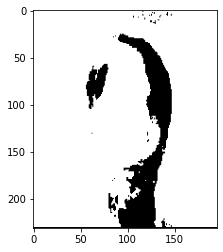

In [94]:
w=np.dot(proj_data,X_test.T)
w=w.reshape(1,30)
recon=np.dot(w,proj_data)
for ele in recon:
  ele=ele.reshape(height,width,channel)
  plt.imshow(ele.astype(np.float))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

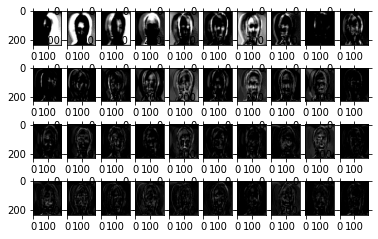

In [95]:
reduced_data = np.array(eigvectors_sort[:40]).transpose()
proj_data = np.dot(x_train.transpose(),reduced_data)
proj_data = proj_data.transpose()
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width,channel)
    plt.subplot(4,10,1+i)
    plt.imshow(img.astype(np.float), cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


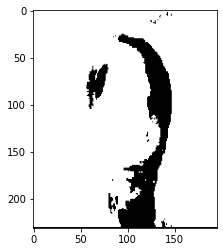

In [96]:
w=np.dot(proj_data,X_test.T)
w=w.reshape(1,40)
recon=np.dot(w,proj_data)
for ele in recon:
  ele=ele.reshape(height,width,channel)
  plt.imshow(ele.astype(np.float))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

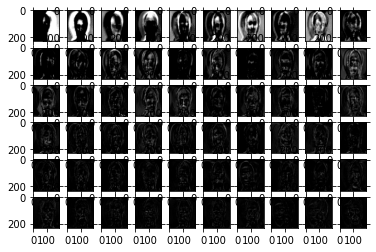

In [ ]:
reduced_data = np.array(eigvectors_sort[:60]).transpose()
proj_data = np.dot(x_train.transpose(),reduced_data)
proj_data = proj_data.transpose()
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width,channel)
    plt.subplot(6,10,1+i)
    plt.imshow(img.astype(np.float), cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


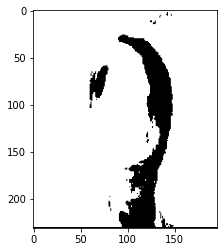

In [ ]:
w=np.dot(proj_data,X_test.T)
w=w.reshape(1,60)
recon=np.dot(w,proj_data)
for ele in recon:
  ele=ele.reshape(height,width,channel)
  plt.imshow(ele.astype(np.float))